In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import os
import sys
import json
import re
import logging
import subprocess
import time
import shutil
import tempfile
import glob

    

In [ ]:
df = pd.read_csv(r"C:\Users\Stanislas Michel\OneDrive\Bureau\FGV - Time Series Analysis\Class 7\AZUL4.csv",
                    sep=";", encoding="latin1", decimal=",")



C:\Users\Stanislas Michel\AppData\Local\Temp\ipykernel_30576\2097647168.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Stanislas Michel\OneDrive\Bureau\FGV - Time Series Analysis\Class 7\AZUL4.csv",


In [7]:
print(df.columns)

Index(['ï»¿DATA1', 'CODNEG', 'PREABE_mean', 'PREMAX_mean', 'PREMIN_mean',
       'PREMED_mean', 'PREULT_mean', 'VOLTOT_sum', 'filter_$'],
      dtype='object')


In [8]:
df

,ï»¿DATA1,CODNEG,PREABE_mean,PREMAX_mean,PREMIN_mean,PREMED_mean,PREULT_mean,VOLTOT_sum,filter_$
0,1/2/2020,AALR3,1829.0,1900.0,1828.0,1868.0,1900.0,1094619600,0
1,1/2/2020,AALR3F,1848.0,1899.0,1830.0,1860.0,1899.0,7171621,0
2,1/2/2020,AALR3T,1877.333333,1878.333333,1877.333333,1877.333333,1878.333333,3011486,0
3,1/2/2020,AAPL34,12000.0,12134.0,12000.0,12073.0,12134.0,153338000,0
4,1/2/2020,AAPL34F,11752.0,12399.0,11752.0,11990.0,12200.0,2913742,0
...,...,...,...,...,...,...,...,...,...
9823516,12/30/2024,ZAGH11,1097.0,1299.0,899.0,1078.0,1050.0,787657,0
9823517,12/30/2024,ZAMP3,224.0,234.0,222.0,226.0,226.0,149848300,0
9823518,12/30/2024,ZAMP3F,223.0,235.0,223.0,227.0,227.0,406847,0
9823519,12/30/2024,ZAMP3T,231.5,232.5,231.5,231.5,232.5,4718971,0


In [9]:
import pandas as pd
import numpy as np  # Pour gérer les NaN

# Définir le chemin du fichier
file_path = r"C:\Users\Stanislas Michel\OneDrive\Bureau\FGV - Time Series Analysis\Class 7\AZUL4.csv"

# Lire le fichier avec le bon séparateur et éviter les warnings
df = pd.read_csv(file_path, encoding="utf-8-sig", sep=";", low_memory=False)

# Renommer la colonne "DATA1" en "DATA"
df.rename(columns={"DATA1": "DATA"}, inplace=True)

# Convertir la colonne DATA en datetime
df["DATA"] = pd.to_datetime(df["DATA"], dayfirst=True, errors="coerce")

# Corriger les colonnes numériques
cols_numeriques = ["PREABE_mean", "PREMAX_mean", "PREMIN_mean", "PREMED_mean", "PREULT_mean", "VOLTOT_sum"]

for col in cols_numeriques:
    if col in df.columns:
        # Supprimer les espaces, remplacer les virgules par des points
        df[col] = df[col].astype(str).str.strip().str.replace(",", ".")
        # Remplacer les valeurs vides par NaN
        df[col] = df[col].replace("", np.nan)
        # Convertir en float en ignorant les erreurs
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Supprimer les lignes où les colonnes numériques sont encore NaN
df.dropna(subset=cols_numeriques, inplace=True)

# Sélectionner les colonnes utiles
cols_utiles = ["DATA", "CODNEG", "PREULT_mean"]
df = df[[col for col in cols_utiles if col in df.columns]]

# Afficher un aperçu
print(df.head())

# Vérifier les types de données
print(df.dtypes)


        DATA   CODNEG   PREULT_mean
0 2020-02-01    AALR3   1900.000000
1 2020-02-01   AALR3F   1899.000000
2 2020-02-01   AALR3T   1878.333333
3 2020-02-01   AAPL34  12134.000000
4 2020-02-01  AAPL34F  12200.000000
DATA           datetime64[ns]
CODNEG                 object
PREULT_mean           float64
dtype: object


In [10]:
df

,DATA,CODNEG,PREULT_mean
0,2020-02-01,AALR3,1900.000000
1,2020-02-01,AALR3F,1899.000000
2,2020-02-01,AALR3T,1878.333333
3,2020-02-01,AAPL34,12134.000000
4,2020-02-01,AAPL34F,12200.000000
...,...,...,...
9823516,NaT,ZAGH11,1050.000000
9823517,NaT,ZAMP3,226.000000
9823518,NaT,ZAMP3F,227.000000
9823519,NaT,ZAMP3T,232.500000


In [11]:
def format_data(df):
    # Vérifier que les colonnes nécessaires existent
    required_columns = ["DATA", "CODNEG", "PREULT_mean"]
    if not all(col in df.columns for col in required_columns):
        raise ValueError("Le DataFrame doit contenir les colonnes: DATA, CODNEG, PREULT_mean")

    # Convertir la colonne DATA en datetime si ce n'est pas déjà fait
    df["DATA"] = pd.to_datetime(df["DATA"], errors="coerce")

    # Supprimer les lignes où DATA est NaT (Not a Time)
    df.dropna(subset=["DATA"], inplace=True)

    # Formater la date au format 'YYYY-MM-DD'
    df["DATA"] = df["DATA"].dt.strftime('%Y-%m-%d')

    # Vérifier que PREULT_mean est de type numérique
    df["PREULT_mean"] = pd.to_numeric(df["PREULT_mean"], errors="coerce")

    # Supprimer les lignes où PREULT_mean est NaN
    df.dropna(subset=["PREULT_mean"], inplace=True)

    # Sélectionner uniquement les colonnes nécessaires
    df = df[required_columns]

    return df

# Appliquer la fonction au DataFrame
df_formatted = format_data(df)

# Afficher un aperçu du DataFrame formaté
print(df_formatted.head())


         DATA   CODNEG   PREULT_mean
0  2020-02-01    AALR3   1900.000000
1  2020-02-01   AALR3F   1899.000000
2  2020-02-01   AALR3T   1878.333333
3  2020-02-01   AAPL34  12134.000000
4  2020-02-01  AAPL34F  12200.000000


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Affichage des premières lignes pour inspection
print(df_azul4.head(20))

# Vérification des doublons dans les dates
duplicates = df_azul4.duplicated(subset='DATA')
print(f"Nombre de doublons: {duplicates.sum()}")

# Suppression des doublons
df_azul4 = df_azul4.drop_duplicates(subset='DATA')

# Vérification des intervalles de dates
df_azul4['DATE_DIFF'] = df_azul4['DATA'].diff().dt.days
print(df_azul4['DATE_DIFF'].describe())

# Tracé du graphique avec plot_date
plt.figure(figsize=(12, 6))
plt.plot_date(df_azul4['DATA'], df_azul4['PREULT_mean'], '-', label="AZUL4", color='blue')

# Ajout de titres et labels
plt.title('Évolution du Prix de AZUL4', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix de Clôture (PREULT_mean)', fontsize=12)

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()



NameError: name 'df_azul4' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que les lignes où CODNEG est AZUL4
df_azul4_filtered = df_azul4[df_azul4['CODNEG'] == 'AZUL4']

# Vérifier que les dates sont continues et correctement formatées
df_azul4_filtered['DATA'] = pd.to_datetime(df_azul4_filtered['DATA'])
df_azul4_filtered = df_azul4_filtered.sort_values('DATA')

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(df_azul4_filtered['DATA'], df_azul4_filtered['PREULT_mean'], label="AZUL4", color='blue')

# Ajout de titres et labels
plt.title('Évolution du Prix de AZUL4', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix de Clôture (PREULT_mean)', fontsize=12)

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


NameError: name 'df_azul4' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que les lignes où CODNEG est AZUL4
df_azul4_filtered = df_azul4[df_azul4['CODNEG'] == 'AZUL4']

# Vérifier que les dates sont continues et correctement formatées
df_azul4_filtered['DATA'] = pd.to_datetime(df_azul4_filtered['DATA'])
df_azul4_filtered = df_azul4_filtered.sort_values('DATA')

# Remplir les dates manquantes avec des NaN
df_azul4_filtered.set_index('DATA', inplace=True)
df_azul4_filtered = df_azul4_filtered.asfreq('D')

# Interpolation des valeurs manquantes pour PREULT_mean
df_azul4_filtered['PREULT_mean'] = df_azul4_filtered['PREULT_mean'].interpolate(method='linear')

# Réinitialisation de l'index pour le traçage
df_azul4_filtered.reset_index(inplace=True)

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(df_azul4_filtered['DATA'], df_azul4_filtered['PREULT_mean'], label="AZUL4", color='blue')

# Ajout de titres et labels
plt.title('Évolution du Prix de AZUL4', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix de Clôture (PREULT_mean)', fontsize=12)

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


NameError: name 'df_azul4' is not defined

In [ ]:
import pandas as pd

# Assurez-vous que la colonne DATA est au format datetime
df_azul4['DATA'] = pd.to_datetime(df_azul4['DATA'], errors='coerce')

# Changer le format des dates à JJ/MM/AAAA
df_azul4['DATA_formatted'] = df_azul4['DATA'].dt.strftime('%d/%m/%Y')

# Afficher un aperçu du DataFrame avec les dates formatées
print(df_azul4[['DATA', 'DATA_formatted', 'PREULT_mean']].head())

import matplotlib.pyplot as plt

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(df_azul4['DATA'], df_azul4['PREULT_mean'], label="AZUL4", color='blue')

# Ajout de titres et labels
plt.title('Évolution du Prix de AZUL4', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix de Clôture (PREULT_mean)', fontsize=12)

# Formater les dates sur l'axe des x
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%Y'))

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


NameError: name 'df_azul4' is not defined

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# Plot ACF
plt.figure(figsize=(10,5))
plot_acf(df["PREULT_mean"], lags=50)  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF) de Compra")
plt.show()

<Figure size 1000x500 with 0 Axes>

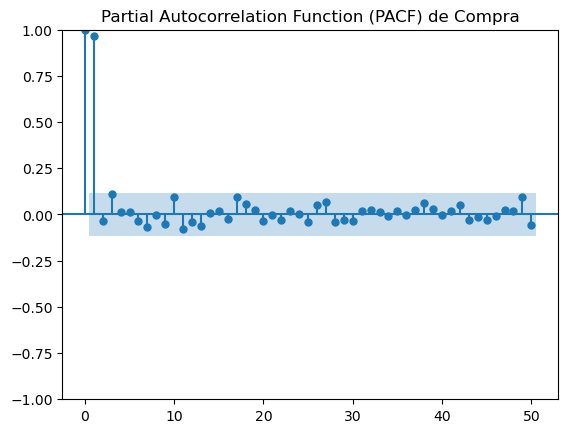

In [17]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
# Plot PACF
plt.figure(figsize=(10,5))
plot_pacf(df["Abertura"], lags=50)  # Adjust lags as needed
plt.title("Partial Autocorrelation Function (PACF) de Compra")
plt.show()

In [19]:
# Compute the first difference
first_difference = np.diff(df["Abertura"])

<Figure size 1000x500 with 0 Axes>

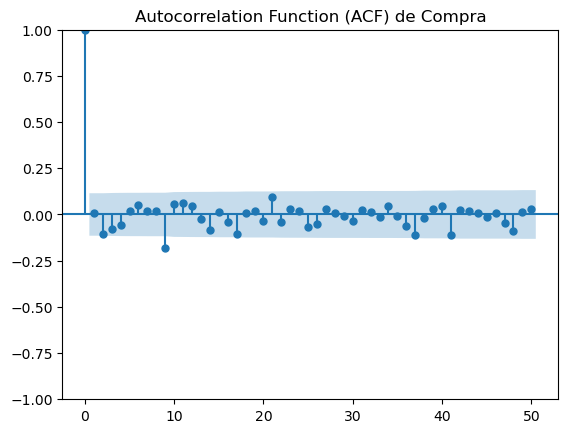

In [21]:
# Plot ACF of first difference
plt.figure(figsize=(10,5))
plot_acf(first_difference, lags=50)  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF) de Compra")
plt.show()

<Figure size 1000x500 with 0 Axes>

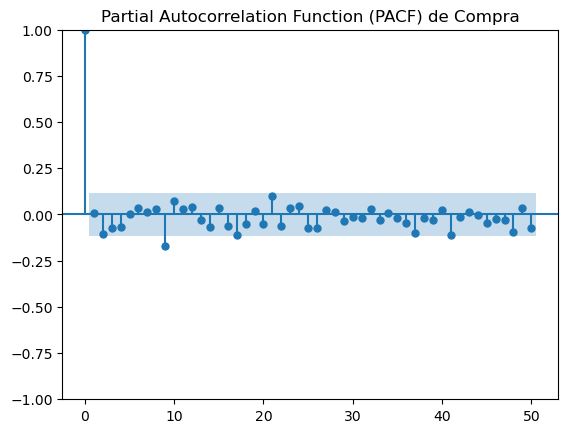

In [23]:
# Plot PACF of first difference
plt.figure(figsize=(10,5))
plot_pacf(first_difference, lags=50)  # Adjust lags as needed
plt.title("Partial Autocorrelation Function (PACF) de Compra")
plt.show()

In [33]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
# Fit ARIMA(1,0,1) model to Comprasw
model = ARIMA(first_difference, order=(1, 0, 1))
fitted_model = model.fit()

In [35]:
# Or full model summary
print("\nModel Summary:")
print(fitted_model.summary())


Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  291
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -493.091
Date:                Mon, 31 Mar 2025   AIC                            994.182
Time:                        02:23:17   BIC                           1008.875
Sample:                             0   HQIC                          1000.068
                                - 291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0730      0.018      4.078      0.000       0.038       0.108
ar.L1          0.9322      0.036     25.565      0.000       0.861       1.004
ma.L1         -1.0000      8.117    